In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import json
#from spotify_utils import get_playlist_df
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.metrics import classification_report

In [2]:
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport
!pip install pandas-profiling
#from preprocessing import PreprocessSongsDecadePrediction
!pip install preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached pydantic-1.9.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached phik-0.12.0-cp39-cp39-win_amd64.whl (659 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [3]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [4]:
## Models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor

## Model selection and fine tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [5]:
!pip install imbalanced-learn

In [6]:
spotify=pd.read_excel("C:/Users/Windows10/Desktop/combined_playlist.xlsx")

In [7]:
spotify.head()

,index,Name,Album,Artist,Top_Genre,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Time Signature
0,1,drivers license,drivers license,Olivia Rodrigo,pop,2021-01-08,242013,33,0.7210,0.585,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,4
1,2,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,canadian pop,2021-03-19,198081,90,0.3210,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,0.464,4
2,3,Heat Waves,Pop Hits 2021,Various Artists,NaN,2021-11-26,238805,21,0.4400,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,0.531,4
3,4,Happier Than Ever,Happier Than Ever,Billie Eilish,art pop,2021-07-30,298899,92,0.7670,0.332,0.225,0.003490,0.1280,-8.697,0.0348,81.055,0.297,3
4,5,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,australian hip hop,2021-07-23,141805,92,0.0383,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,0.478,4


In [8]:
spotify.rename(columns = {'Time Signature': 'Time_Signature'}, inplace = True)

In [9]:
spotify['is_popular'] = spotify['Popularity'].apply(lambda x: True if x>50 else False)

In [10]:
spotify.head()

,index,Name,Album,Artist,Top_Genre,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Time_Signature,is_popular
0,1,drivers license,drivers license,Olivia Rodrigo,pop,2021-01-08,242013,33,0.7210,0.585,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,4,False
1,2,Peaches (feat. Daniel Caesar & Giveon),Justice,Justin Bieber,canadian pop,2021-03-19,198081,90,0.3210,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,0.464,4,True
2,3,Heat Waves,Pop Hits 2021,Various Artists,NaN,2021-11-26,238805,21,0.4400,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,0.531,4,False
3,4,Happier Than Ever,Happier Than Ever,Billie Eilish,art pop,2021-07-30,298899,92,0.7670,0.332,0.225,0.003490,0.1280,-8.697,0.0348,81.055,0.297,3,True
4,5,STAY (with Justin Bieber),F*CK LOVE 3: OVER YOU,The Kid LAROI,australian hip hop,2021-07-23,141805,92,0.0383,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,0.478,4,True


In [11]:
#split the data
features= ["Length",  "Acousticness", "Danceability", "Energy","Instrumentalness","Liveness",'Loudness' , "Speechiness", "Tempo", "Valence", "Time_Signature"]
X = spotify[features]
y = spotify['is_popular']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
#reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
feature_names = [X_train.columns]
forest = RandomForestClassifier(random_state=40)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=40)

In [13]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.017 seconds


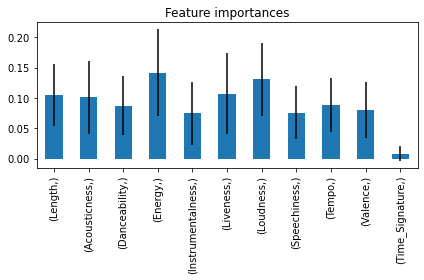

In [14]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
#ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

From the feature importance, we can conclude that the importance of time signature is obviously lower than other features, so we decide to drop this variable.

In [15]:
X.drop(['Time_Signature'], axis=1)

,Length,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,242013,0.721000,0.585,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132
1,198081,0.321000,0.677,0.696,0.000000,0.4200,-6.181,0.1190,90.030,0.464
2,238805,0.440000,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,0.531
3,298899,0.767000,0.332,0.225,0.003490,0.1280,-8.697,0.0348,81.055,0.297
4,141805,0.038300,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,0.478
...,...,...,...,...,...,...,...,...,...,...
391,197126,0.000316,0.532,0.891,0.000164,0.0836,-5.349,0.0551,106.003,0.487
392,204745,0.008930,0.463,0.908,0.000003,0.3660,-4.373,0.0756,99.993,0.459
393,211235,0.079700,0.398,0.934,0.000000,0.2450,-3.581,0.0752,169.898,0.629
394,197260,0.003330,0.462,0.973,0.000129,0.0563,-3.878,0.1020,109.548,0.111


In [16]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=10)

In [18]:
#linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('R^2 = ',lr.score(X_test, y_test))

R^2 =  0.10110344536858595


In [19]:
y_pred = lr.predict(X_test)

In [20]:
import sklearn.metrics as metrics

In [21]:
print('MAE =', metrics.mean_absolute_error(y_test, y_pred))
print('MSE =',metrics.mean_squared_error(y_test, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE = 0.40456245498793386
MSE = 0.20390848120183308
RMSE = 0.4515622672476445


In [22]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = 0.001,min_samples_split = 100,random_state = 66)
dt = dt.fit(X_train, y_train)

In [23]:
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test , y_pred)
print('Accuracy Score = ' , score)

Accuracy Score =  0.75


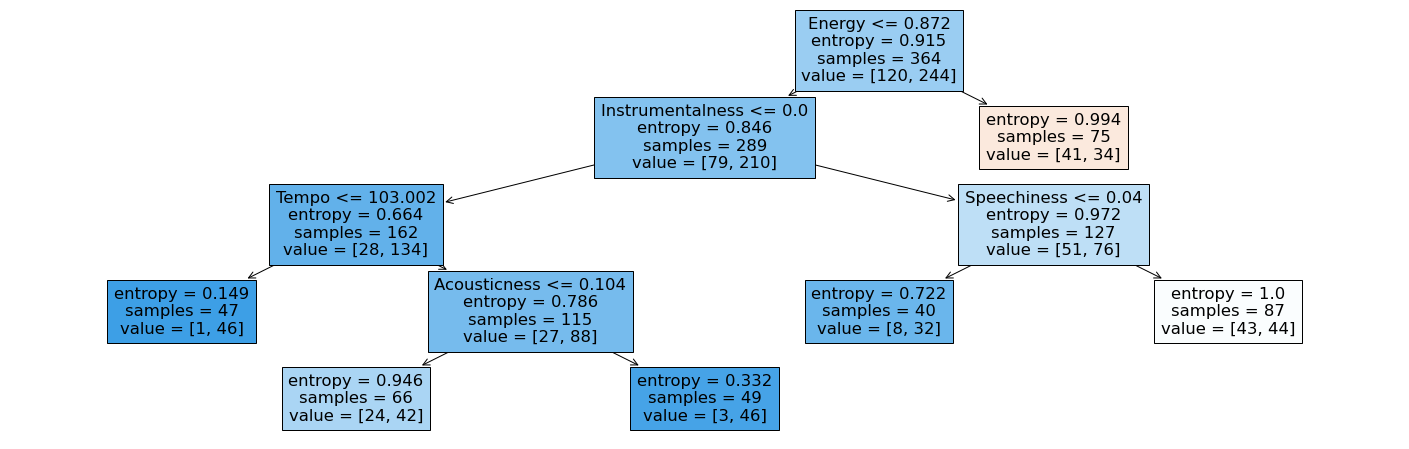

In [24]:
from sklearn import tree
plt.figure(figsize=(25,8))
tree.plot_tree(dt, feature_names = X_test.columns,filled=True)
plt.show()

In [25]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [26]:
print('Accuracy Score = ' , metrics.accuracy_score(y_test,knn_pred))
pd.crosstab(knn_pred, y_test,rownames = ["Predicted"], colnames = ["Actual"])

Accuracy Score =  0.6195652173913043


Actual,False,True
Predicted,,
False,15,18
True,17,42


In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9, max_iter=2000)

In [28]:
logreg.fit(X_train, y_train)
# The coefficients
print('Intercept: \n', logreg.intercept_)
print('Coefficients: \n', logreg.coef_)

Intercept: 
 [2.29492032e-11]
Coefficients: 
 [[ 3.49398646e-06  2.03254951e-11  4.19759248e-11 -9.87208841e-12
  -6.73598186e-13 -1.16318339e-11 -1.80959863e-10  1.38573316e-11
   6.53795879e-10  2.94754556e-11  1.16665903e-10]]


In [29]:
y_test_predict = logreg.predict(X_test)

print('Accuracy Score = ' , metrics.accuracy_score(y_test, y_test_predict))

Accuracy Score =  0.6521739130434783


In [30]:
#support vector machine
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train , y_train)

SVC()

In [31]:
y_pred = svc.predict(X_test)

score = metrics.accuracy_score(y_test , y_pred)

print('Accuracy Score = ' , score)

Accuracy Score =  0.6521739130434783


In [32]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        32
        True       0.65      1.00      0.79        60

    accuracy                           0.65        92
   macro avg       0.33      0.50      0.39        92
weighted avg       0.43      0.65      0.51        92



E:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#ridge regression
from sklearn.linear_model import LinearRegression, RidgeCV

In [34]:
# instantiate linear regression object
ridge = RidgeCV(cv=5)

# fit or train the linear regression model on the training set and store parameters
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [35]:
y_pred = ridge.predict(X_test)

In [36]:
print('MAE =', metrics.mean_absolute_error(y_test, y_pred))
print('MSE =',metrics.mean_squared_error(y_test, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE = 0.4220456674867677
MSE = 0.21079601592153988
RMSE = 0.45912527257986996


In [37]:
print('R^2 = ',ridge.score(X_test, y_test))

R^2 =  0.07074089647921189


In [38]:
#Random Forest
random_grid = {'max_depth': [2,4,6,8,10], 'min_samples_leaf': [1, 2, 4, 6]}
rf_class = RandomForestClassifier(criterion = 'entropy', max_features = 'auto')
grid_rf_class = GridSearchCV(
    estimator = rf_class,
    param_grid = random_grid,
    scoring = 'accuracy',
    n_jobs = 4,
    cv = 5,
    refit = True,
    return_train_score = True
)

In [39]:
grid_rf_class.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6]},
             return_train_score=True, scoring='accuracy')

In [40]:
y_pred_test = grid_rf_class.predict(X_test)

In [41]:
print(grid_rf_class.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)


In [42]:
accuracy = grid_rf_class.score(X_test, y_test)

print('Accuracy: %.2f' % accuracy)

Accuracy: 0.86


In [43]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.88      0.69      0.77        32
        True       0.85      0.95      0.90        60

    accuracy                           0.86        92
   macro avg       0.87      0.82      0.83        92
weighted avg       0.86      0.86      0.85        92



In [44]:
#lasso
lasso=Lasso()

lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)

In [45]:
print('MAE =', metrics.mean_absolute_error(y_test, y_pred))
print('MSE =',metrics.mean_squared_error(y_test, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE = 0.4467726215928635
MSE = 0.2269449941948866
RMSE = 0.4763874412648665


In [46]:
print('R^2 = ',lasso.score(X_test, y_test))

R^2 =  -0.00044918274245819845
